<a href="https://colab.research.google.com/github/Priyanshujha45/CIFAR-10ImageClassification/blob/main/18_CIFAR_10ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train a CNN model on the CIFAR-10 dataset to classify images into 10 categories like airplanes, cats, trucks, etc.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and normalize CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0                                     # Normalize training images
X_test = X_test / 255.0                                       # Normalize test images
y_train = y_train.squeeze()                                   # Remove extra dimension
y_test = y_test.squeeze()
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [ ]:

# Define class labels for display
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Build a CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),  # 32 filters
    tf.keras.layers.MaxPooling2D((2,2)),                                            # Max pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                           # 64 filters
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),                                                     # Flatten output
    tf.keras.layers.Dense(64, activation='relu'),                                  # Hidden dense layer
    tf.keras.layers.Dense(10, activation='softmax')                                # Output for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.3285 - loss: 1.7981 - val_accuracy: 0.5126 - val_loss: 1.3281
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.5458 - loss: 1.2689 - val_accuracy: 0.5824 - val_loss: 1.1675
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 87s 48ms/step - accuracy: 0.6196 - loss: 1.0825 - val_accuracy: 0.6356 - val_loss: 1.0445
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.6605 - loss: 0.9664 - val_accuracy: 0.6724 - val_loss: 0.9370
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.6939 - loss: 0.8677 - val_accuracy: 0.6608 - val_loss: 0.9629
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7164 - loss: 0.8078 - val_accuracy: 0.6972 - val_loss: 0.8712
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.7350 - loss: 0.7564 - val_accuracy: 0.7122 - val_loss: 0.8319
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7552 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


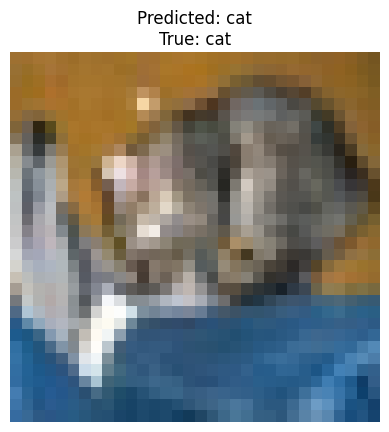

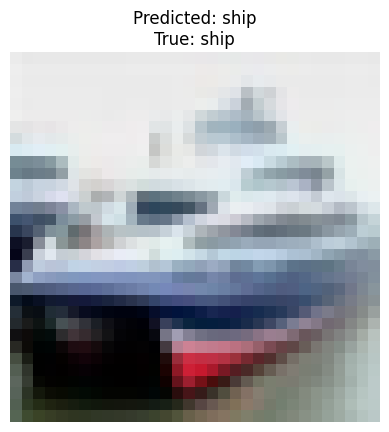

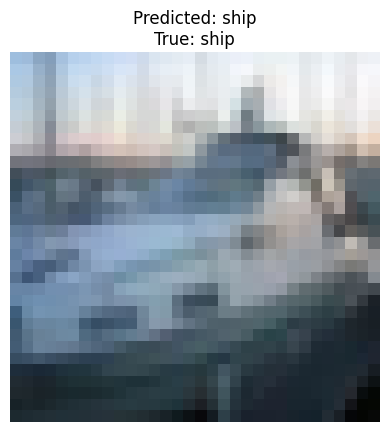

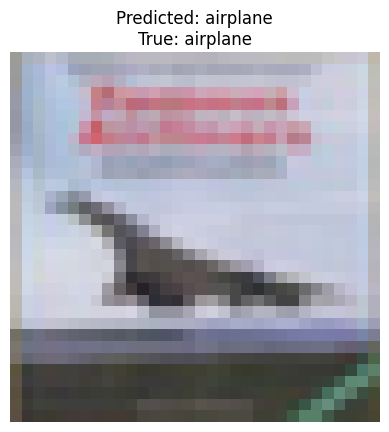

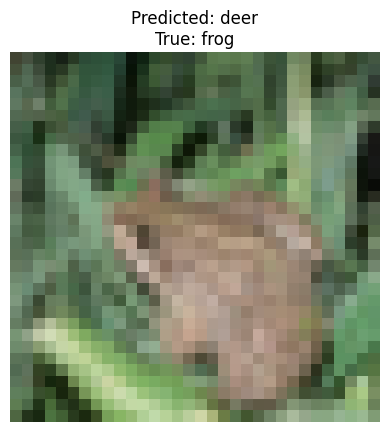

In [ ]:

# Predict and display a few test images
preds = model.predict(X_test[:5])
for i, pred in enumerate(preds):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_names[tf.argmax(pred)]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()